<a href="https://colab.research.google.com/github/Shalini12102/ML_Model/blob/main/ML_Models_ON_Test_Data_BY_SHALINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**
This section imports the necessary libraries for data analysis and visualization. We'll be using:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing necessary libraries
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
# Enables inline plotting
%matplotlib inline

# Importing preprocessing and scaling tools
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler  # Different types of scalers

# Importing tools for data splitting
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets

# Importing machine learning models
from xgboost import XGBClassifier  # XGBoost classifier
from lightgbm import LGBMClassifier  # LightGBM classifier

# Importing evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix  # For measuring model performance

#importing XGBoost and LightGBM (Unnecessary duplication)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Installing CatBoot(This command is required only if CatBoost is not installed)
!pip install catboost

# Importing CatBoost classifier
from catboost import CatBoostClassifier

# Importing accuracy score metric again (Unnecessary duplication)
from sklearn.metrics import accuracy_score

# For Plotting ROC-Curve
from sklearn.metrics import roc_curve, auc

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')  # Ignores unnecessary warning messages


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


#**Loading and Exploring Data**
This section loads the dataset using pandas and provides a preliminary exploration.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Test_data.csv')

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


#**Data Cleaning**
This section focuses on cleaning and preprocessing the dataset by handling missing values.

##**Handling Missing Data**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
previous_year_rating,1812
education,1034
employee_id,0
department,0
region,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
length_of_service,0


In [ ]:
# Filling missing values
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
df['education'].fillna('Not_provided', inplace=True)
#I fill blanks with Not_provided for easily understand the blanks

In [ ]:
# Verifying if missing values are handled
df.isnull().sum().sort_values(ascending=False)

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.312984,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.216959,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


#**Exploratory Data Analysis (EDA)**
This section performs exploratory data analysis to understand the data patterns and relationships.

#**Univariate Analysis (Understanding Single Variables)**
This subsection focuses on understanding individual variables using visualizations like count plots and histograms.

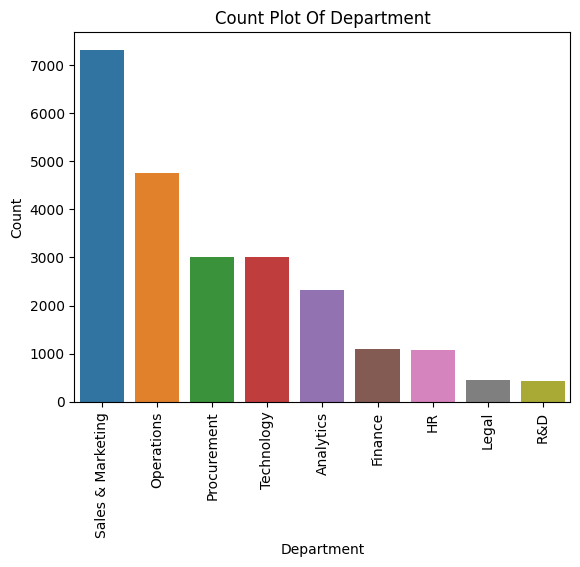

In [ ]:
sns.countplot(x=df['department'], palette="tab10",order=df['department'].value_counts().index)
plt.title("Count Plot Of Department")
plt.xlabel("Department")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

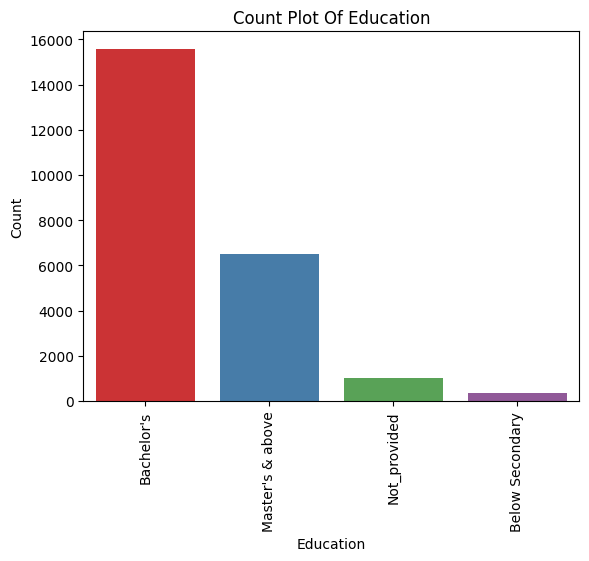

In [ ]:
sns.countplot(x=df['education'], palette="Set1")
plt.title("Count Plot Of Education")
plt.xlabel("Education")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

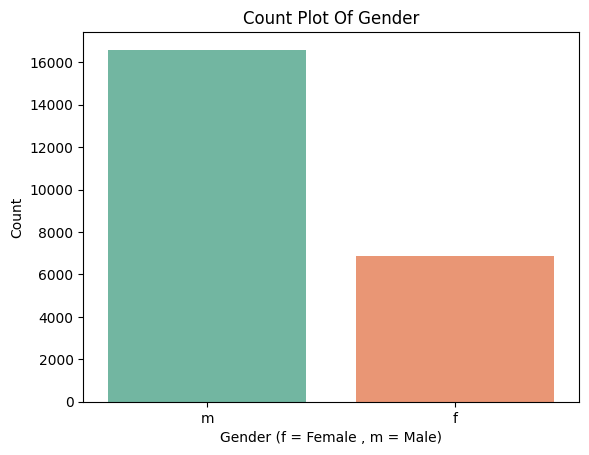

In [ ]:
sns.countplot(x=df['gender'], palette="Set2")
plt.title("Count Plot Of Gender")
plt.xlabel("Gender (f = Female , m = Male)")
plt.ylabel("Count")
plt.show()

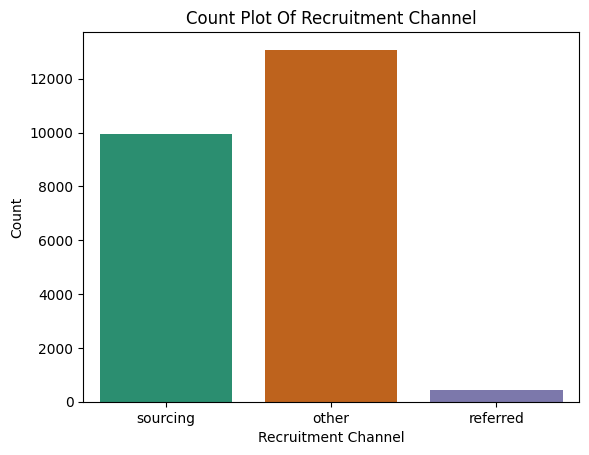

In [ ]:
sns.countplot(x=df['recruitment_channel'], palette="Dark2")
plt.title("Count Plot Of Recruitment Channel")
plt.xlabel("Recruitment Channel")
plt.ylabel("Count")
plt.show()

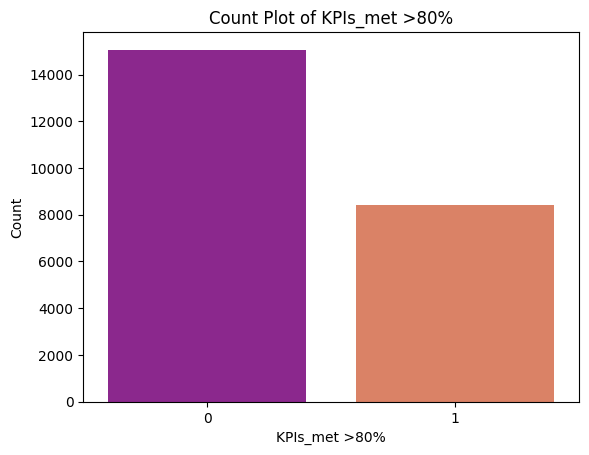

In [ ]:
# Plot 1: Distribution of KPIs_met >80%
sns.countplot(x=df['KPIs_met >80%'], palette="plasma")
plt.title("Count Plot of KPIs_met >80%")
plt.xlabel("KPIs_met >80%")
plt.ylabel("Count")
plt.show()


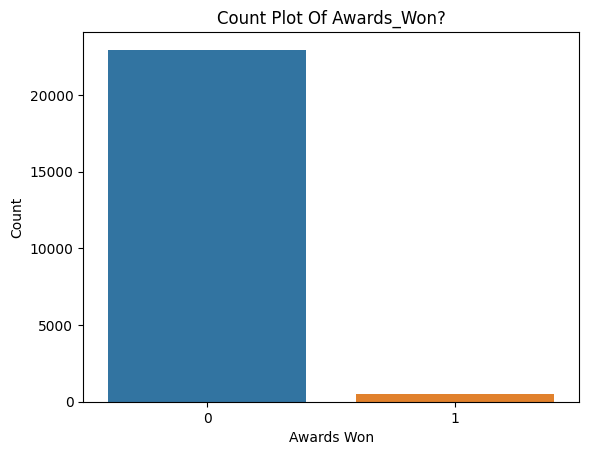

In [ ]:
# Plot 2: Distribution of awards_won?
sns.countplot(data=df, x='awards_won?', palette="tab10")
plt.title("Count Plot Of Awards_Won?")
plt.xlabel("Awards Won")
plt.ylabel("Count")
plt.show()

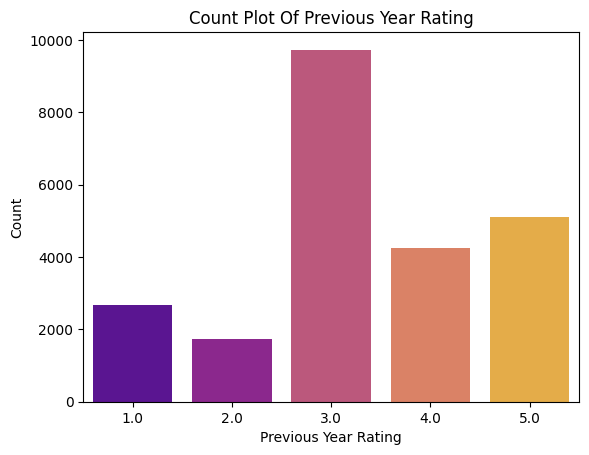

In [ ]:
# Plot 3: Distribution of previous_year_rating
sns.countplot(data=df, x='previous_year_rating', palette="plasma")
plt.title("Count Plot Of Previous Year Rating")
plt.xlabel("Previous Year Rating")
plt.ylabel("Count")
plt.show()

#**Bivariate Analysis (Comparing Two Variables)**
This subsection explores the relationships between two variables using visualizations like count plots and box plots.
It investigates how different variables are associated with each other and identifies potential patterns.


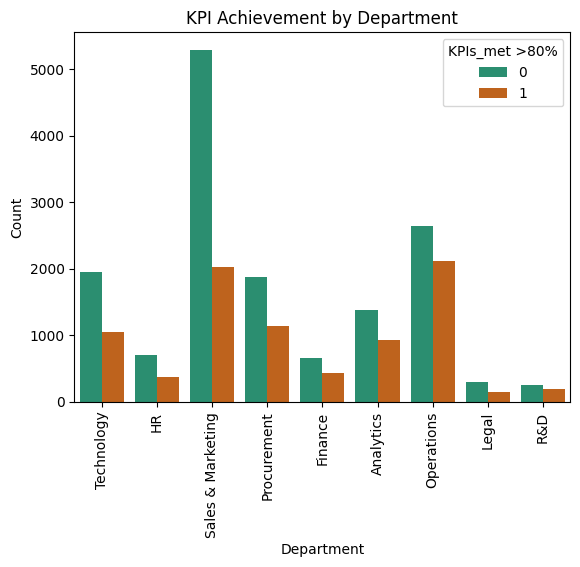

In [ ]:
# KPI Achievement by Department
sns.countplot(data=df, x='department', hue='KPIs_met >80%', palette="Dark2")
plt.title("KPI Achievement by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

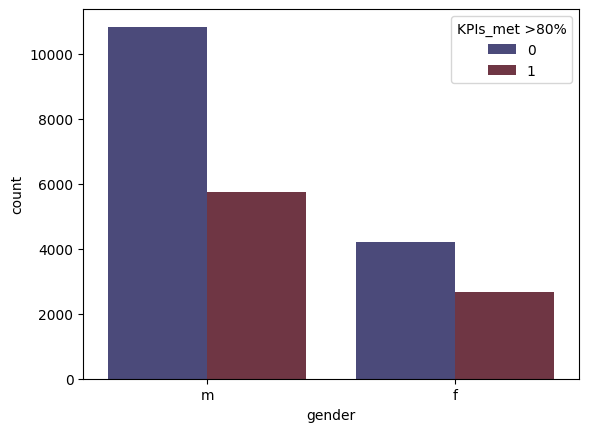

In [ ]:
# KPI Achievement by Gender
sns.countplot(data=df, x='gender', hue='KPIs_met >80%', palette="icefire")
plt.show()

#**Numeric vs. Categorical Comparisons (Boxplots)**
This subsection uses box plots to compare the distributions of a numerical variable across different categories of a categorical variable.
It helps in understanding how the numerical variable varies based on the categorical groups.


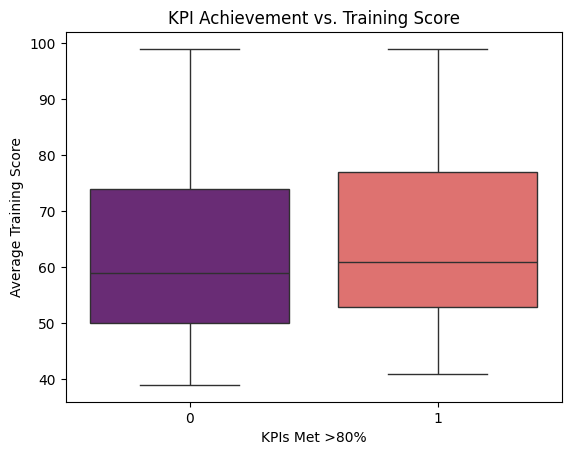

In [ ]:
# KPI Achievement by Training Score (Boxplot)
sns.boxplot(data=df, x='KPIs_met >80%', y='avg_training_score', palette="magma")
plt.title("KPI Achievement vs. Training Score")
plt.xlabel("KPIs Met >80%")
plt.ylabel("Average Training Score")
plt.show()

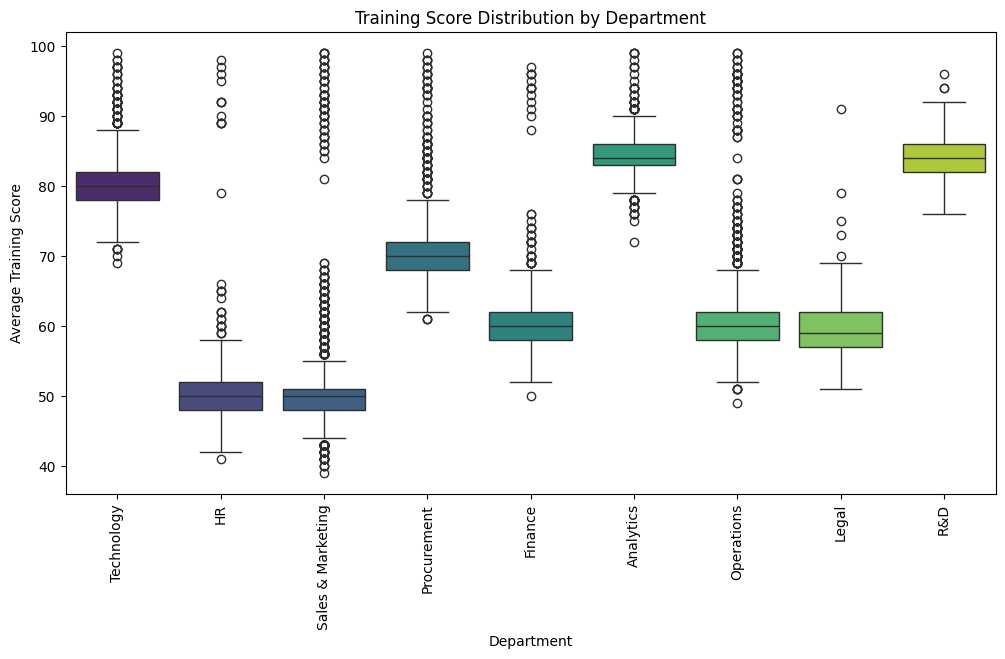

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='department', y='avg_training_score', palette="viridis")
plt.xticks(rotation=90)
plt.title("Training Score Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Average Training Score")
plt.show()


#**Histograms for Numerical Variables**
This subsection uses histograms to visualize the distributions of numerical variables.
It provides insights into the frequency of different values and the overall shape of the distribution.


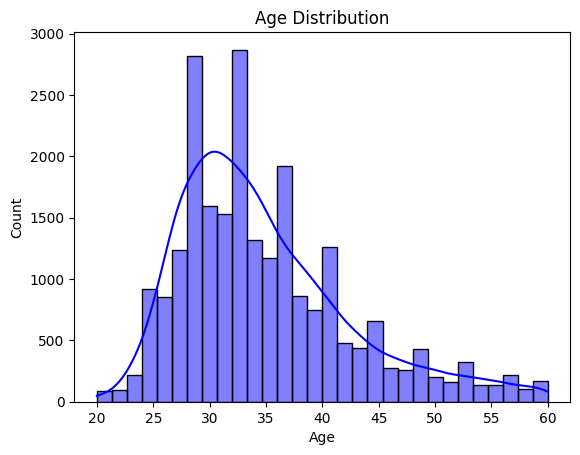

In [ ]:
# Age Distribution
sns.histplot(df['age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

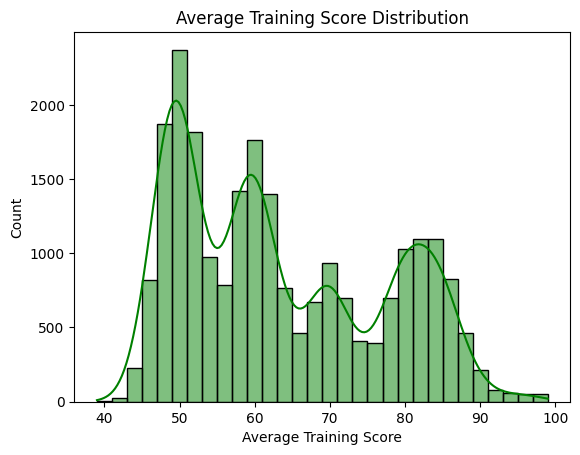

In [ ]:
# Training Score Distribution
sns.histplot(df['avg_training_score'], bins=30, kde=True, color="green")
plt.title("Average Training Score Distribution")
plt.xlabel("Average Training Score")
plt.ylabel("Count")
plt.show()

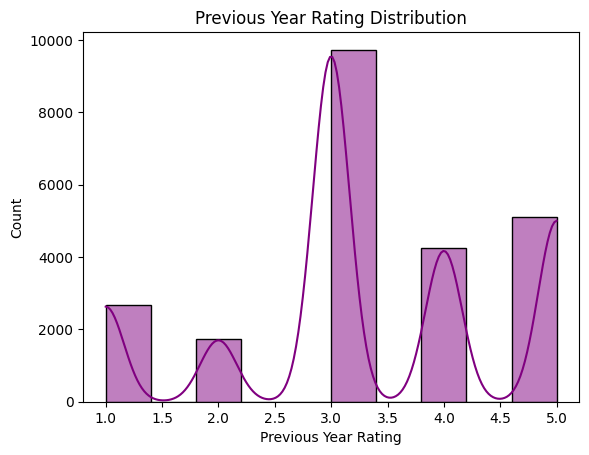

In [ ]:
# Previous Year Rating Distribution
sns.histplot(df['previous_year_rating'].dropna(), bins=10, kde=True, color="purple")
plt.title("Previous Year Rating Distribution")
plt.xlabel("Previous Year Rating")
plt.ylabel("Count")
plt.show()

#**Correlation Heatmap → (For Numerical Features)**
This subsection uses a heatmap to visualize the correlations between numerical features.
It helps in identifying relationships and dependencies between different variables.

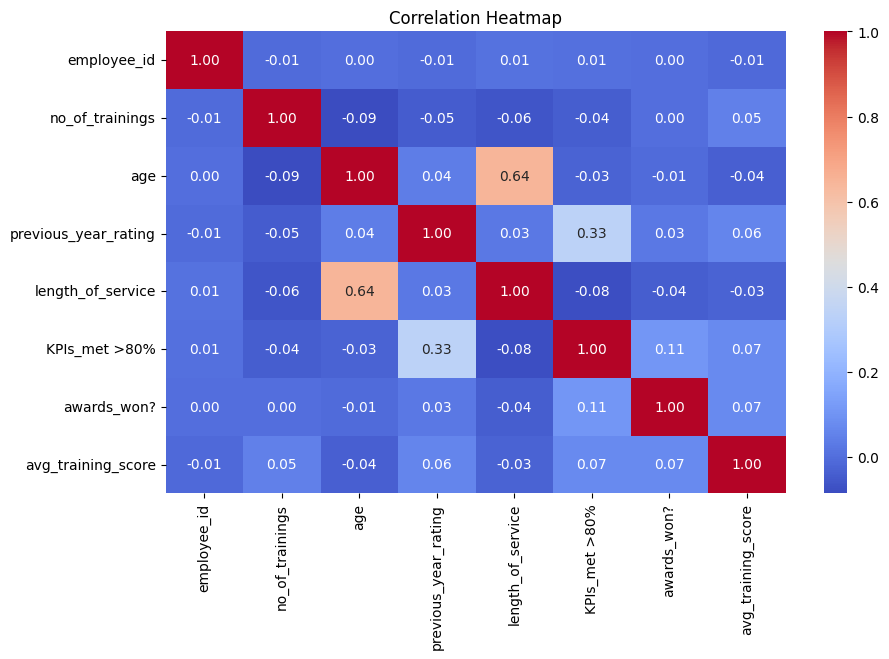

In [ ]:
plt.figure(figsize=(10,6))
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#**Training Data and Data Scaling**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical missing values with median
df.fillna("Unknown", inplace=True)  # Fill categorical missing values with "Unknown"

# Encode categorical variables using Label Encoding for simplicity
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=["employee_id", "KPIs_met >80%"])  # Remove ID and target variable
y = df["KPIs_met >80%"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Function to apply scalers only to numerical columns
def apply_scalers_to_numerical(X_train, X_test, numerical_cols):
    scalers = {
        "RobustScaler": RobustScaler(),
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "MaxAbsScaler": MaxAbsScaler()
    }

    scaled_data = {}

    for name, scaler in scalers.items():
        X_train_scaled = X_train.copy()  # Copy original data
        X_test_scaled = X_test.copy()

        # Scale only numerical columns
        X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

        scaled_data[name] = (X_train_scaled, X_test_scaled)

    return scaled_data

# Apply scaling only to numerical columns
scaled_datasets = apply_scalers_to_numerical(X_train, X_test, numerical_cols)

# Print a sample to verify
for scaler, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
    print(f"Scaler: {scaler}")
    print("X_train_scaled sample:\n", X_train_scaled, "\n")


Scaler: RobustScaler
X_train_scaled sample:
        department  region  education  gender  recruitment_channel  \
14729    1.000000     1.0        1.0     0.0                  0.0   
1730     0.666667     1.9        1.5     0.0                  1.0   
16251   -0.333333     0.9        0.0     0.0                  0.0   
8359    -1.333333     0.0        0.0     0.0                  1.0   
22912    0.000000     0.6        0.0    -1.0                  0.0   
...           ...     ...        ...     ...                  ...   
1665     1.000000    -0.6        0.0    -1.0                  1.0   
22506    0.666667    -0.3        0.0    -1.0                  0.0   
12546   -0.333333    -0.8        0.0     0.0                  0.0   
22396   -0.333333    -0.2        0.0    -1.0                  1.0   
17493   -0.333333    -0.3        0.0     0.0                  0.0   

       no_of_trainings  age  previous_year_rating  length_of_service  \
14729              0.0  0.8                  -1.0     

#**Baseline ML Model**

In [ ]:
# Define models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Function to train and evaluate models
def train_and_evaluate(scaled_datasets, models, y_train, y_test):
    results = {}

    for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
        results[scaler_name] = {}

        for model_name, model in models.items():
            model.fit(X_train_scaled, y_train)  # Train the model
            y_pred = model.predict(X_test_scaled)  # Predict on test set
            acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
            conf_matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix

            results[scaler_name][model_name] = {
                "accuracy": acc,
                "confusion_matrix": conf_matrix
            }

    return results

# Train and evaluate models
model_results = train_and_evaluate(scaled_datasets, models, y_train, y_test)
model_results


[LightGBM] [Info] Number of positive: 6743, number of negative: 12049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358823 -> initscore=-0.580477
[LightGBM] [Info] Start training from score -0.580477
[LightGBM] [Info] Number of positive: 6743, number of negative: 12049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [bin

{'RobustScaler': {'XGBoost': {'accuracy': 0.6900808854831844,
   'confusion_matrix': array([[2509,  503],
          [ 953,  733]])},
  'CatBoost': {'accuracy': 0.6979565772669221,
   'confusion_matrix': array([[2565,  447],
          [ 972,  714]])},
  'LightGBM': {'accuracy': 0.6990208599404002,
   'confusion_matrix': array([[2583,  429],
          [ 985,  701]])}},
 'StandardScaler': {'XGBoost': {'accuracy': 0.6900808854831844,
   'confusion_matrix': array([[2509,  503],
          [ 953,  733]])},
  'CatBoost': {'accuracy': 0.6979565772669221,
   'confusion_matrix': array([[2565,  447],
          [ 972,  714]])},
  'LightGBM': {'accuracy': 0.6975308641975309,
   'confusion_matrix': array([[2571,  441],
          [ 980,  706]])}},
 'MinMaxScaler': {'XGBoost': {'accuracy': 0.6900808854831844,
   'confusion_matrix': array([[2509,  503],
          [ 953,  733]])},
  'CatBoost': {'accuracy': 0.6979565772669221,
   'confusion_matrix': array([[2565,  447],
          [ 972,  714]])},
  'Ligh

#**ROC-Curve For Binary Classification**

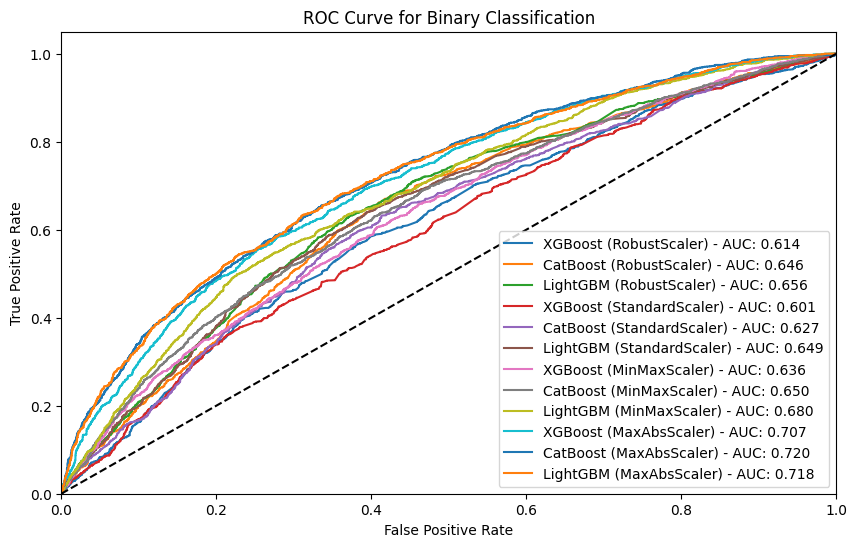

In [ ]:
# Function to plot ROC curves
def plot_roc_curve(models, scaled_datasets, y_test):
    plt.figure(figsize=(10, 6))

    for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
        for model_name, model in models.items():
            # Get predicted probabilities
            y_probs = model.predict_proba(X_test_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, label=f"{model_name} ({scaler_name}) - AUC: {roc_auc:.3f}")

    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Binary Classification")
    plt.legend(loc="lower right")
    plt.show()

# Generate and plot ROC curves for available models (XGBoost & LightGBM)
plot_roc_curve(models, scaled_datasets, y_test)


##In the above ROC-Curve everything is messy and didn't understandable so I'm going to separate it.

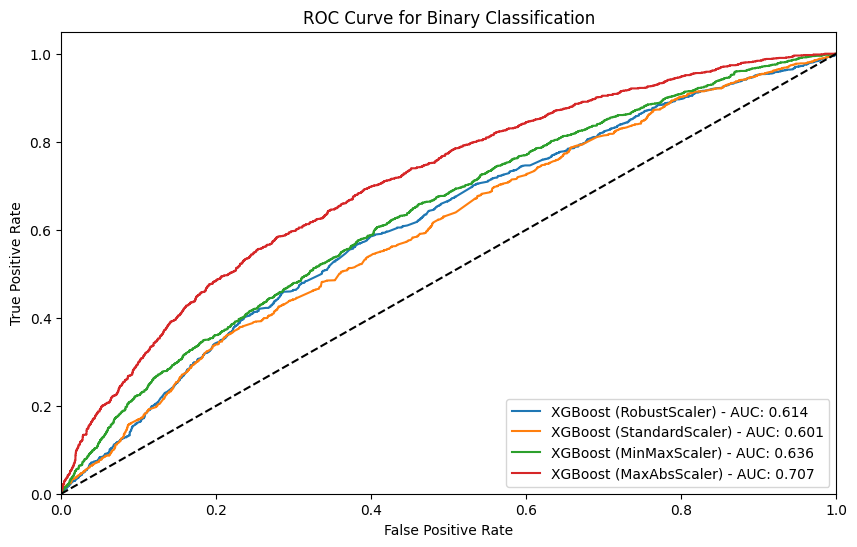

In [ ]:
# defining models with only XGBoost
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Train XGBoost model
model_results = train_and_evaluate(scaled_datasets, models, y_train, y_test)

# Plot ROC Curve for XGBoost
plot_roc_curve(models, scaled_datasets, y_test)


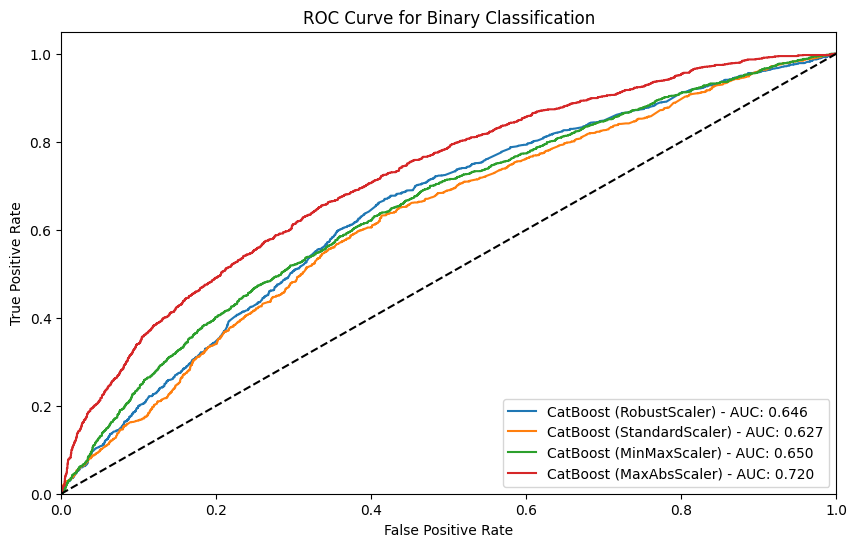

In [ ]:
# defining models with only CatBoost
models = {
     "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train XGBoost model
model_results = train_and_evaluate(scaled_datasets, models, y_train, y_test)

# Plot ROC Curve for XGBoost
plot_roc_curve(models, scaled_datasets, y_test)


[LightGBM] [Info] Number of positive: 6743, number of negative: 12049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358823 -> initscore=-0.580477
[LightGBM] [Info] Start training from score -0.580477
[LightGBM] [Info] Number of positive: 6743, number of negative: 12049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [bin

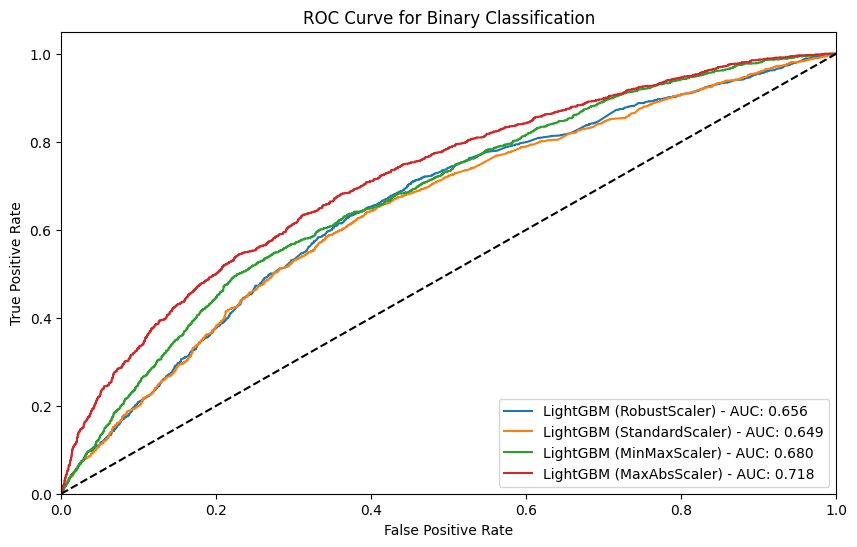

In [ ]:
# defining models without LightGBM
models = {
    "LightGBM": LGBMClassifier(random_state=42)
}

# Train models again (without CatBoost)
model_results = train_and_evaluate(scaled_datasets, models, y_train, y_test)

# Plot ROC Curve
plot_roc_curve(models, scaled_datasets, y_test)
